In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [9]:
data_file = pd.read_csv(r"../../data/global_GEM/analysis_plant/coal2gas_indicators.csv")
data_file

,GEM_Name,Total_MW_2022,Max_Cap_MW,Max_Cap_Year,Max_Cap_Share_Perc,Perc_El_2021,Country Code,Ret_Tot_MW,Ret_Mean_Lifetime,IND_Perc_Ret_MW,Early_Ret_Tot_MW,IND_Perc_EarlyRet_MW,IND_Perc_Cap22ofPeak,Coal_RetOnly_MW,Coal_Transition_MW,IND_Perc_RetOnly_MW,IND_Perc_Transition_MW,IND_Perc_Transition_vs_Ret,check_overcount
0,Peru,0.0,135.0,2021.0,0.859993,0.859993,PER,135.0,23.000000,100.0,135.0,100.000000,0.0,135.0,0.0,100.000000,0.000000,0.000000,0.0
1,Austria,0.0,1993.0,2000.0,11.255303,0.209111,AUT,1993.0,30.500000,100.0,522.0,26.191671,0.0,1681.0,312.0,84.345208,15.654792,15.654792,0.0
2,Belgium,0.0,2865.0,1999.0,15.027709,0.040392,BEL,2865.0,43.789474,100.0,0.0,0.000000,0.0,2188.0,677.0,76.369983,23.630017,23.630017,0.0
3,Portugal,0.0,2028.0,1999.0,35.258890,1.618123,PRT,2028.0,33.000000,100.0,682.0,33.629191,0.0,1296.0,732.0,63.905325,36.094675,36.094675,0.0
4,Sweden,0.0,291.0,2013.0,0.729264,0.005822,SWE,291.0,44.000000,100.0,0.0,0.000000,0.0,291.0,0.0,100.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,Morocco,4257.0,4257.0,2022.0,57.820824,57.820824,MAR,0.0,NaN,0.0,0.0,0.000000,100.0,0.0,0.0,0.000000,0.000000,NaN,0.0
67,Myanmar,190.0,190.0,2022.0,3.980322,3.980322,MMR,0.0,NaN,0.0,0.0,0.000000,100.0,0.0,0.0,0.000000,0.000000,NaN,0.0
68,Namibia,120.0,120.0,2022.0,3.184713,3.184713,NAM,0.0,NaN,0.0,0.0,0.000000,100.0,0.0,0.0,0.000000,0.000000,NaN,0.0
69,North Macedonia,800.0,800.0,2022.0,39.393940,39.393940,MKD,0.0,NaN,0.0,0.0,0.000000,100.0,0.0,0.0,0.000000,0.000000,NaN,0.0


In [10]:
country_names = pd.read_excel(r"../../data/country_names.xlsx")
country_names = country_names[["Country Code","Reform_Name","GEM_Name"]]
power_reform = pd.read_csv(r"../../data/global_UrpelainenYang_reform/power_reform.csv")
power_reform = pd.merge(power_reform,country_names,left_on="cntry",right_on="Reform_Name").dropna()
power_reform = power_reform.set_index("GEM_Name")
power_reform

,cntry,year,R_IndepProducer,R_Private,R_Unbundle,R_WholeSale,R_IndepReg,R_Choice,R_Liberalization,R_Corp,Country Code,Reform_Name
GEM_Name,,,,,,,,,,,,
Yemen,"Yemen, Rep.",2013.0,0,0,0,0,1,0,1,1,YEM,"Yemen, Rep."
Egypt,"Egypt, Arab Rep.",2013.0,1,0,1,1,1,0,1,0,EGY,"Egypt, Arab Rep."
Myanmar,Myanmar,2013.0,0,0,0,0,0,0,0,0,MMR,Myanmar
Russia,Russian Federation,2013.0,1,1,1,1,1,0,1,1,RUS,Russian Federation
Vietnam,Vietnam,2013.0,1,0,0,0,1,0,1,1,VNM,Vietnam
...,...,...,...,...,...,...,...,...,...,...,...,...
Spain,Spain,2008.0,1,1,1,1,1,1,1,1,ESP,Spain
Sweden,Sweden,2008.0,1,0,1,1,1,1,1,1,SWE,Sweden
Türkiye,Turkey,2008.0,1,1,1,1,1,1,1,1,TUR,Turkey


In [14]:
data_file = data_file.sort_values(by="Max_Cap_MW",ascending=False)
#data_file = data_file.sort_values(by="Max_Cap_MW",ascending=False)Max_Cap_Share_Perc
select_data = data_file.head(20)
select_data["p_RetOnly"] = select_data["Max_Cap_Share_Perc"]*select_data["IND_Perc_RetOnly_MW"]/100
select_data["p_Transition"] = select_data["Max_Cap_Share_Perc"]*select_data["IND_Perc_Transition_MW"]/100
select_data["p_Remain"] =  select_data["Max_Cap_Share_Perc"] - select_data["p_RetOnly"] - select_data["p_Transition"]
select_data = select_data.set_index("GEM_Name")
select_data["R_WholeSale"] = power_reform["R_WholeSale"]
select_data["Max_Cap_TW"] = select_data["Max_Cap_MW"]/1000000
select_data

C:\Users\jx920\AppData\Local\Temp\ipykernel_10256\135141668.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_data["p_RetOnly"] = select_data["Max_Cap_Share_Perc"]*select_data["IND_Perc_RetOnly_MW"]/100
C:\Users\jx920\AppData\Local\Temp\ipykernel_10256\135141668.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  select_data["p_Transition"] = select_data["Max_Cap_Share_Perc"]*select_data["IND_Perc_Transition_MW"]/100
C:\Users\jx920\AppData\Local\Temp\ipykernel_10256\135141668.py:6: SettingWithCopyW

,Total_MW_2022,Max_Cap_MW,Max_Cap_Year,Max_Cap_Share_Perc,Perc_El_2021,Country Code,Ret_Tot_MW,Ret_Mean_Lifetime,IND_Perc_Ret_MW,Early_Ret_Tot_MW,...,Coal_Transition_MW,IND_Perc_RetOnly_MW,IND_Perc_Transition_MW,IND_Perc_Transition_vs_Ret,check_overcount,p_RetOnly,p_Transition,p_Remain,R_WholeSale,Max_Cap_TW
GEM_Name,,,,,,,,,,,,,,,,,,,,,
China,1098577.50,1098577.50,2022.0,62.931730,62.931730,CHN,120939.35,21.948608,11.008723,83527.85,...,12540.00,9.867247,1.141476,10.368834,-1.776357e-15,6.209629,0.718351,56.003750,0,1.098577
United States,212041.66,340154.20,2011.0,43.345764,21.624334,USA,148764.92,51.401084,43.734553,5793.10,...,59712.78,26.179933,17.554621,40.139019,0.000000e+00,11.347892,7.609185,24.388688,1,0.340154
India,235848.70,235848.70,2022.0,74.173010,74.173010,IND,15651.10,42.608108,6.636076,2017.50,...,494.10,6.426578,0.209499,3.156967,0.000000e+00,4.766786,0.155392,69.250832,1,0.235849
Japan,53586.98,53586.98,2022.0,32.510197,32.510197,JPN,2673.90,35.421053,4.989831,468.40,...,1055.00,3.021070,1.968762,39.455477,0.000000e+00,0.982156,0.640048,30.887993,1,0.053587
Germany,40889.80,52867.10,2015.0,44.262809,28.252954,DEU,25301.80,41.584746,47.859255,3693.70,...,7357.60,33.942093,13.917162,29.079354,0.000000e+00,15.023724,6.160127,23.078959,1,0.052867
South Africa,45894.10,46274.10,2021.0,86.348564,86.348564,ZAF,1180.00,60.800000,2.550023,0.00,...,180.00,2.161036,0.388986,15.254237,0.000000e+00,1.866024,0.335884,84.146656,0,0.046274
Russia,39668.50,43637.50,2015.0,14.821658,17.302496,RUS,10096.00,49.035088,23.136064,457.00,...,6381.00,8.513320,14.622744,63.203249,-3.552714e-15,1.261815,2.167333,11.392510,1,0.043638
Indonesia,40471.60,40471.60,2022.0,61.457830,61.457830,IDN,0.00,NaN,0.000000,0.00,...,0.00,0.000000,0.000000,NaN,0.000000e+00,0.000000,0.000000,61.457830,0,0.040472
South Korea,39154.00,39154.00,2022.0,35.715010,35.715010,KOR,3420.00,39.363636,8.734740,0.00,...,2195.00,3.128671,5.606068,64.181287,0.000000e+00,1.117405,2.002208,32.595397,1,0.039154


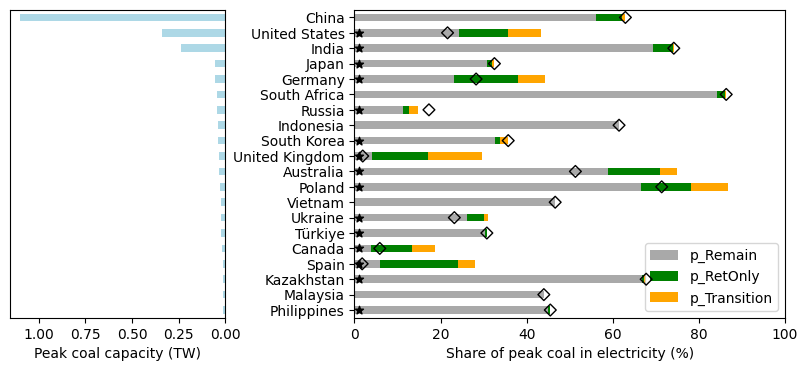

In [16]:
fig, ax = plt.subplots(1,2,figsize=(10,4),gridspec_kw={'width_ratios': [0.5,1]})
plt.subplots_adjust(wspace=0.4)
select_choice = select_data.copy()
select_choice[select_choice["R_WholeSale"]==0] = -5
select_data[["p_Remain","p_RetOnly","p_Transition"]][::-1].plot.barh(stacked=True, ax=ax[1],color=["darkgray","green","orange"])
ax[1].scatter(select_choice[::-1]["R_WholeSale"],select_choice[::-1].index,zorder=10,color="black",marker="*")
ax[1].scatter(select_data[::-1]["Perc_El_2021"],select_data[::-1].index,zorder=11,color="None",marker="D",edgecolor="black")
ax[1].set_ylabel(None)
ax[1].set_xlim([0,100])
ax[1].set_xlabel("Share of peak coal in electricity (%)")
select_data[["Max_Cap_TW"]][::-1].plot.barh(stacked=True, ax=ax[0],color=["lightblue"],legend=None)
ax[0].set_xlabel("Peak coal capacity (TW)")
ax[0].invert_xaxis()
ax[0].set_ylabel(None)
ax[0].get_yaxis().set_visible(False)

In [6]:
select_data_1 = select_data.query("R_Choice==1").reset_index().set_index("Country Code")
select_data_0 = select_data.query("R_Choice==0").reset_index().set_index("Country Code")
select_data_1

,GEM_Name,Total_MW_2022,Max_Cap_MW,Max_Cap_Year,Max_Cap_Share_Perc,Perc_El_2021,Ret_Tot_MW,Ret_Mean_Lifetime,IND_Perc_Ret_MW,Early_Ret_Tot_MW,...,Coal_Transition_MW,IND_Perc_RetOnly_MW,IND_Perc_Transition_MW,IND_Perc_Transition_vs_Ret,check_overcount,p_RetOnly,p_Transition,p_Remain,R_Choice,Max_Cap_TW
Country Code,,,,,,,,,,,,,,,,,,,,,
USA,United States,212041.66,340154.20,2011.0,43.345764,21.624334,148764.92,51.401084,43.734553,5793.1,...,59712.78,26.179933,17.554621,40.139019,0.000000e+00,11.347892,7.609185,24.388688,1,0.340154
JPN,Japan,53586.98,53586.98,2022.0,32.510197,32.510197,2673.90,35.421053,4.989831,468.4,...,1055.00,3.021070,1.968762,39.455477,0.000000e+00,0.982156,0.640048,30.887993,1,0.053587
DEU,Germany,40889.80,52867.10,2015.0,44.262809,28.252954,25301.80,41.584746,47.859255,3693.7,...,7357.60,33.942093,13.917162,29.079354,0.000000e+00,15.023724,6.160127,23.078959,1,0.052867
GBR,United Kingdom,5234.00,35856.50,1999.0,29.662149,1.927334,30802.50,44.365854,85.904927,0.0,...,15230.00,43.430061,42.474865,49.444039,0.000000e+00,12.882290,12.598958,4.180902,1,0.035856
AUS,Australia,24437.00,31004.00,2009.0,74.899938,51.319520,6607.00,42.660000,21.310154,181.0,...,1636.00,16.033415,5.276738,24.761616,0.000000e+00,12.009018,3.952274,58.938646,1,0.031004
POL,Poland,29159.60,30626.60,2011.0,86.790544,71.359850,7124.00,48.135593,23.260826,265.0,...,3034.00,13.354404,9.906421,42.588433,0.000000e+00,11.590360,8.597837,66.602347,1,0.030627
TUR,Türkiye,20493.16,20493.16,2022.0,30.756460,30.756460,360.00,15.000000,1.756684,360.0,...,0.00,1.756684,0.000000,0.000000,0.000000e+00,0.540294,0.000000,30.216166,1,0.020493
CAN,Canada,4706.80,18604.20,1999.0,18.640631,5.880662,14818.40,40.085106,79.650832,725.0,...,5163.40,51.896883,27.753948,34.844518,1.421085e-14,9.673906,5.173511,3.793213,1,0.018604
ESP,Spain,2945.50,13800.60,2005.0,27.904092,1.794616,10892.10,42.102564,78.924829,899.7,...,1925.20,64.974711,13.950118,17.675196,-2.842171e-14,18.130603,3.892654,5.880835,1,0.013801


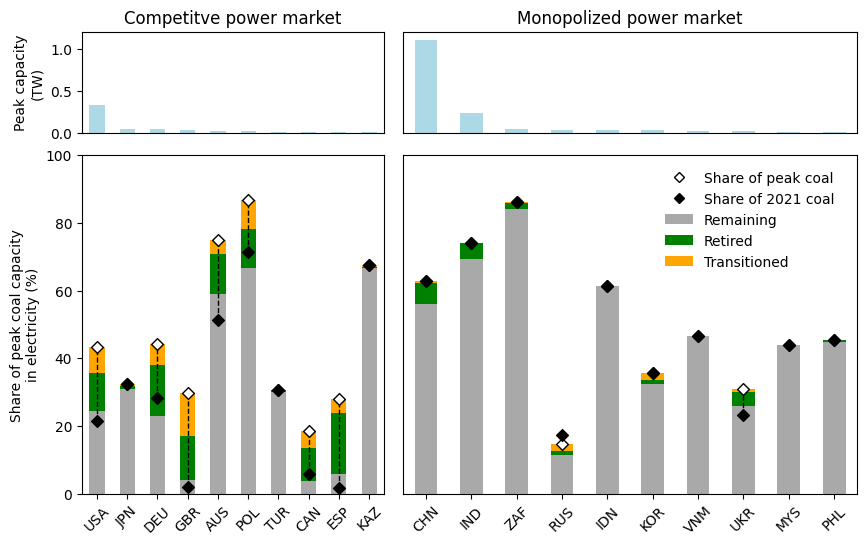

In [7]:
fig, ax = plt.subplots(2,2,figsize=(10,6),gridspec_kw={'width_ratios': [0.8,1.2],'height_ratios': [0.3,1]})
plt.subplots_adjust(wspace=0.05,hspace=0.1)
select_data_1[["p_Remain","p_RetOnly","p_Transition"]].plot.bar(stacked=True, ax=ax[1,0],color=["darkgray","green","orange"],legend=None)
select_data_0[["p_Remain","p_RetOnly","p_Transition"]].plot.bar(stacked=True, ax=ax[1,1],color=["darkgray","green","orange"])
select_data_1[["Max_Cap_TW"]].plot.bar(stacked=True, ax=ax[0,0],color=["lightblue"],legend=None)
select_data_0[["Max_Cap_TW"]].plot.bar(stacked=True, ax=ax[0,1],color=["lightblue"],legend=None)
#ax[0,0].set_yscale('log')
#ax[0,1].set_yscale('log')
ax[0,0].set_ylim([0,1.2])
ax[0,1].set_ylim([0,1.2])
ax[0,0].set_title("Competitve power market")
ax[0,1].set_title("Monopolized power market")
ax[0,0].get_xaxis().set_visible(False)
ax[0,1].get_xaxis().set_visible(False)
ax[1,0].set_ylim([0,100])
ax[1,1].set_ylim([0,100])
ax[1,0].set_xlabel(None)
ax[1,1].set_xlabel(None)
ax[0,1].get_yaxis().set_visible(False)
ax[1,1].get_yaxis().set_visible(False)
ax[0,0].set_ylabel("Peak capacity\n(TW)")
ax[1,0].set_ylabel("Share of peak coal capacity\nin electricity (%)")
ax[1,0].scatter(select_data_1.index,select_data_1["Perc_El_2021"],zorder=12,color="black",marker="D",edgecolor="black")
ax[1,0].scatter(select_data_1.index,select_data_1["Max_Cap_Share_Perc"],zorder=11,color="white",marker="D",edgecolor="black")
ax[1,0].vlines(select_data_1.index, select_data_1["Perc_El_2021"], select_data_1["Max_Cap_Share_Perc"], 
               ls = '--',color='black', linewidth=1, zorder=10)
ax[1,1].scatter(select_data_0.index,select_data_0["Perc_El_2021"],zorder=12,color="black",marker="D",edgecolor="black")
ax[1,1].scatter(select_data_0.index,select_data_0["Max_Cap_Share_Perc"],zorder=11,color="white",marker="D",edgecolor="black")
ax[1,1].vlines(select_data_0.index, select_data_0["Perc_El_2021"], select_data_0["Max_Cap_Share_Perc"], 
               ls = '--',color='black', linewidth=1, zorder=10)
ax[1,0].set_xticklabels(ax[1,0].get_xticklabels(), rotation=45)
ax[1,1].set_xticklabels(ax[1,1].get_xticklabels(), rotation=45)
legend_elements = [Line2D([0], [0], marker='D', color='black', label='Share of peak coal',markerfacecolor='white',ls="None",markersize=5),
                   Line2D([0], [0], marker='D', color='black', label='Share of 2021 coal',markerfacecolor='black', ls="None", markersize=5),
                   Patch(facecolor="darkgray", edgecolor=None, label="Remaining"),
                   Patch(facecolor="green", edgecolor=None, label="Retired"),
                   Patch(facecolor="orange", edgecolor=None, label="Transitioned")]
ax[1,1].legend(handles=legend_elements, bbox_to_anchor=(0.55, 0.99),loc='upper left',frameon=False)
fig.savefig("top20peak_coal_inventory_wholesale.png",dpi=600, bbox_inches='tight')